## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%

We need  to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given us  a ballpark of the target lead conversion rate to be around 80%.

 

### The steps we will be taking while making this model would be :
  #### Step 1 : Analysing the data , cleaning it and refining it .
        - Opening the file and analysing it 
        - Identifying the no of rows and the columns 
        - Identifying the data type of the columns 
        - Removing a duplicate entry , if there is any  for any customer 
        - Checking if there are some null values in any column and removing the column if the percentage of null values is    greater than 40 percent ( a random value we decided for this model)

In [1]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [5]:
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

In [6]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [7]:
## Also the select variable need to be replaced with null as it in fact signifies that customer has not selected any category
leads = leads.replace('Select',np.nan)

In [8]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#checking null values in each rows

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [10]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
#dropping cols with more than 40% missing values


cols=leads.columns



cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index)))>= 40):
        leads.drop(i,1,inplace = True )
        

In [12]:
#checking null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

### Step 2 : Observing the columns according to their categories , treating them and doing Exploratory Analysis 

### so we can observe that there are many categorical columns and also some numerical columns so will do 
  - First we impute all the null values by the mode of that column and then we find that if in certain columns there are some categories which have very less percentage of data so better we club these categories into one naming the category to be other or miscellaneous 
-   Second we analyse that if there are some categorical variables to see if there are some imbalances in them as if there are some , those columns need to be dropped   


### Category Variables Analysis 

In [14]:
df = leads.select_dtypes(include=['object'])
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
leads['City'].value_counts(dropna = False)# dropna is written with the code to get null values also as output if available.

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:

leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [17]:
leads['City'].value_counts(dropna = False )

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

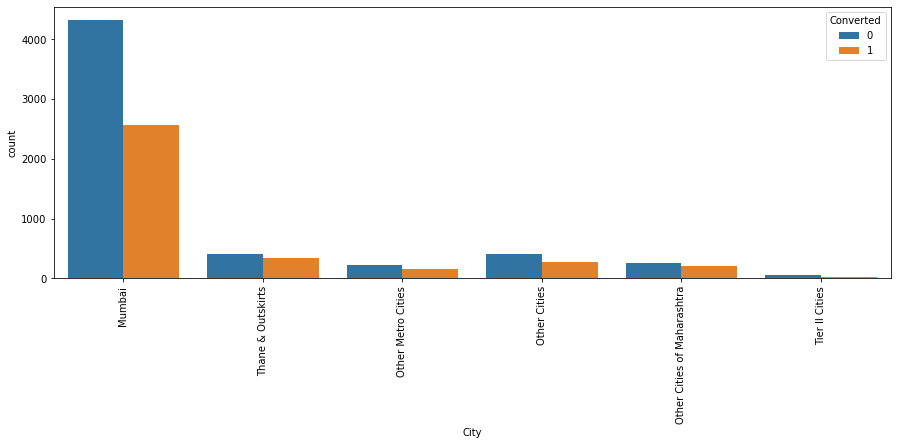

In [18]:
plt.figure(figsize = (15,5))
s2 =  sns.countplot(leads.City,hue = leads.Converted)
s2.set_xticklabels(s2.get_xticklabels() , rotation = 90)
plt.show()

#### by analysing the above countplot we can say that the highest conversion rate is from people of Thane and the Outskirts,so we can concentrate these people after people from city mumbai   

In [19]:
## Checking the value counts of Specialisation
leads['Specialization'].value_counts(dropna = False ) 

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### As we can see that there is a high number of people who have not provided any specialisation , this could be tha they may be students or they did not want to specify , so we will change the missing values to non specified .

In [20]:
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Specified')

In [21]:
leads['Specialization'].value_counts(dropna = False)

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

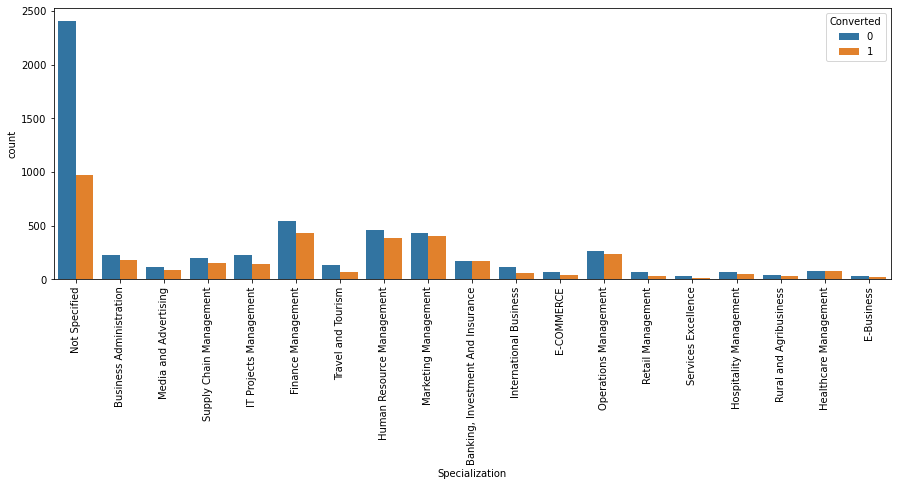

In [22]:
plt.figure(figsize = (15,5))
s3 = sns.countplot(leads.Specialization,hue = leads.Converted)
s3.set_xticklabels(s3.get_xticklabels() , rotation = 90)
plt.show()

In [23]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [24]:
leads['Specialization'].value_counts(dropna = False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

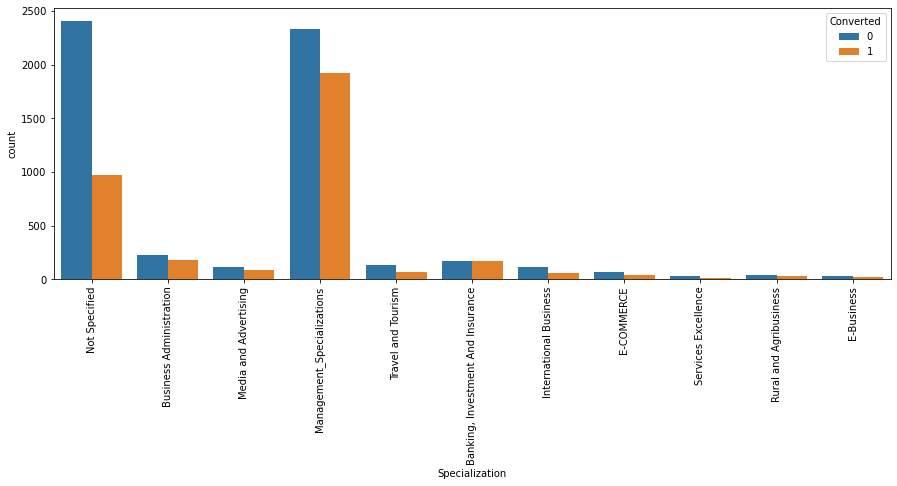

In [25]:
plt.figure(figsize = (15,5))
s3 = sns.countplot(leads.Specialization,hue = leads.Converted)
s3.set_xticklabels(s3.get_xticklabels() , rotation = 90)
plt.show()

#### So here we observe that highest conversions are from Management Specialisations in which we have clubbed all the specialisations which show similar trends 

In [26]:
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [28]:
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

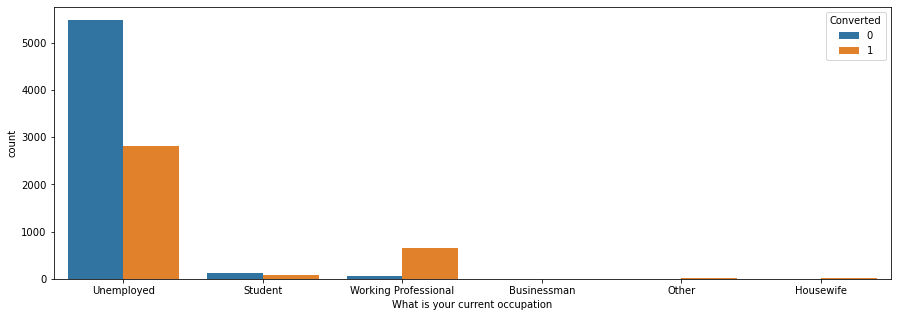

In [29]:
plt.figure(figsize = (15,5))
s4 = sns .countplot(leads['What is your current occupation'], hue = leads.Converted)
plt.show()


#### So we can observe that working professional have the highest ratio of Conversions

In [30]:
leads['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [31]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Unsubscribed','Unreachable','Had a Phone Conversation','Unreachable','Had a Phone Conversation','Email Marked Spam','Email Marked Spam','Email Received','Form Submitted on Website','View in browser link Clicked','View in browser link Clicked','Approached upfront','Resubscribed to emails'],'Others')

In [32]:
leads['Last Notable Activity'].value_counts(dropna = False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      100
Email Bounced                60
Name: Last Notable Activity, dtype: int64

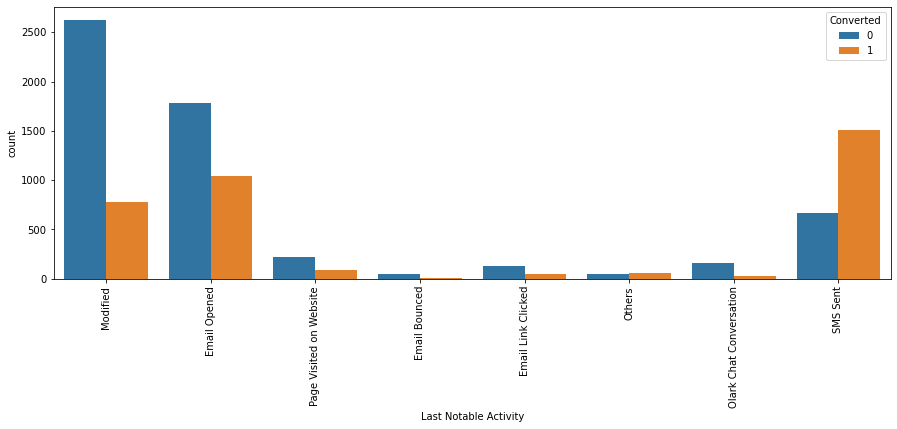

In [33]:
plt.figure(figsize = (15,5))
s4 = sns.countplot(leads['Last Notable Activity'],hue = leads.Converted)
s4.set_xticklabels(s4.get_xticklabels() , rotation = 90)
plt.show()

#### here we can observe that the conversions are highest with the 'sms sent' column ,so here we can concentrate 

In [34]:
leads['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [35]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [36]:
leads['Tags'].value_counts(dropna = False)

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
leads['Tags'] = leads['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','Interested in Next batch','In confusion whether part time or DLP','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Miscelleneous')

In [38]:
leads['Tags'].value_counts(dropna = False)

Not Specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Miscelleneous                           302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

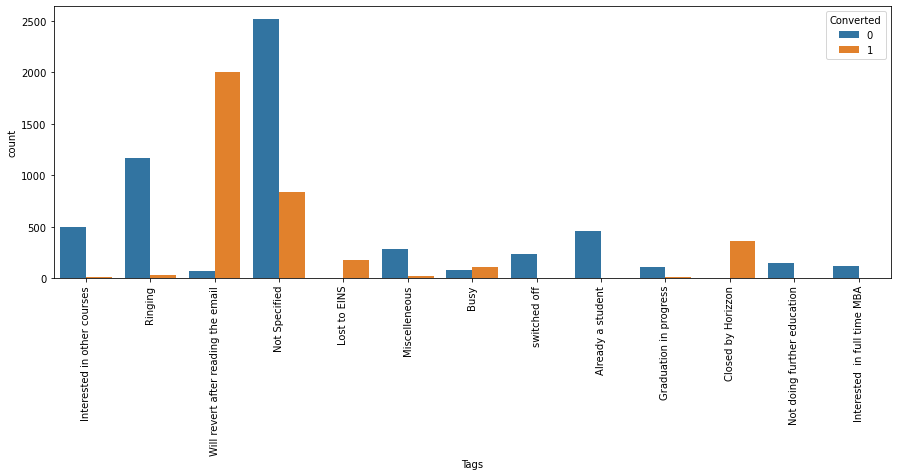

In [39]:
plt.figure(figsize = (15,5))
s5 = sns.countplot(leads['Tags'],hue = leads.Converted)
s5.set_xticklabels(s5.get_xticklabels(), rotation = 90)
plt.show()

#### here we observe that people who read our mails have highest conversions so better we concentrate on this 

In [40]:
leads['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

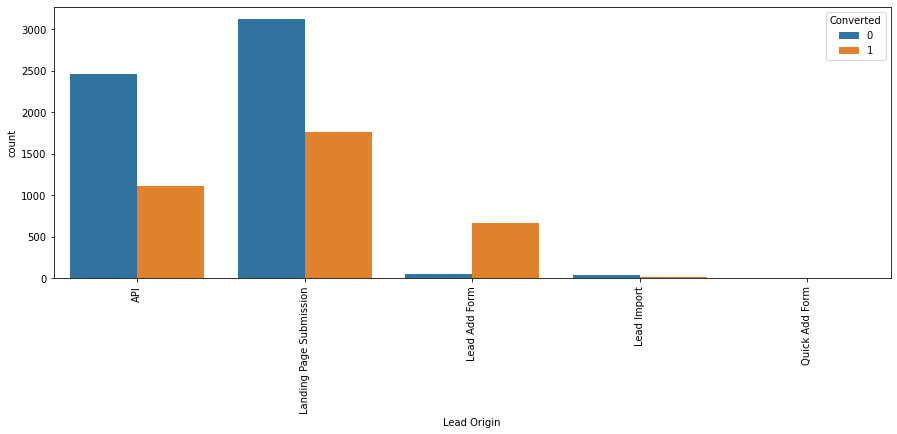

In [41]:
plt.figure(figsize = (15,5))
s6 = sns.countplot(leads['Lead Origin'],hue = leads.Converted)
s6.set_xticklabels(s6.get_xticklabels() , rotation = 90)
plt.show()


- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [42]:
leads['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
testone                 1
blog                    1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [43]:
leads['Lead Source'] =leads['Lead Source'].replace([np.nan,'bing','google','Click2call','Press_Release','Live Chat','Social Media','WeLearn','Pay per Click Ads','youtubechannel','welearnblog_Home','NC_EDM','testone','blog'], 'Others')

In [44]:
leads['Lead Source'].value_counts(dropna = False)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                64
Facebook              55
Name: Lead Source, dtype: int64

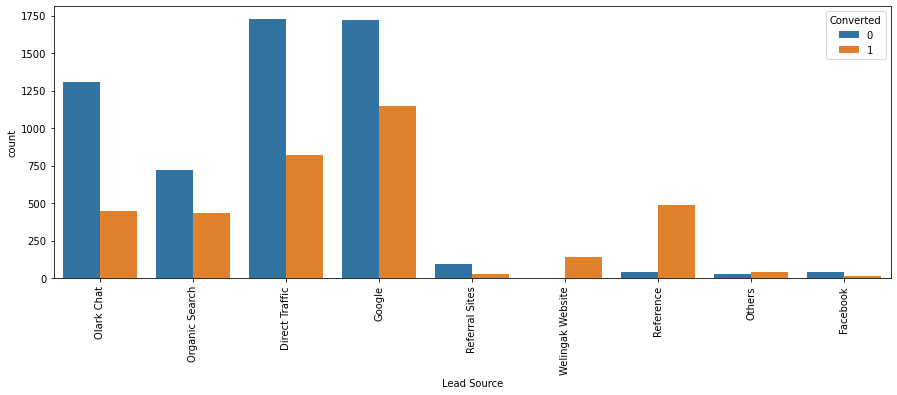

In [45]:
plt.figure(figsize = (15,5))
s7 = sns.countplot(leads['Lead Source'],hue = leads.Converted)
s7.set_xticklabels(s7.get_xticklabels() , rotation = 90)
plt.show()

#### so here we observe that in all the catgories the Reference and the Welingak Website columns  have the highest conversions 

In [46]:
leads['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [47]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [48]:
leads['Last Activity'].value_counts(dropna= False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
NaN                           103
Name: Last Activity, dtype: int64

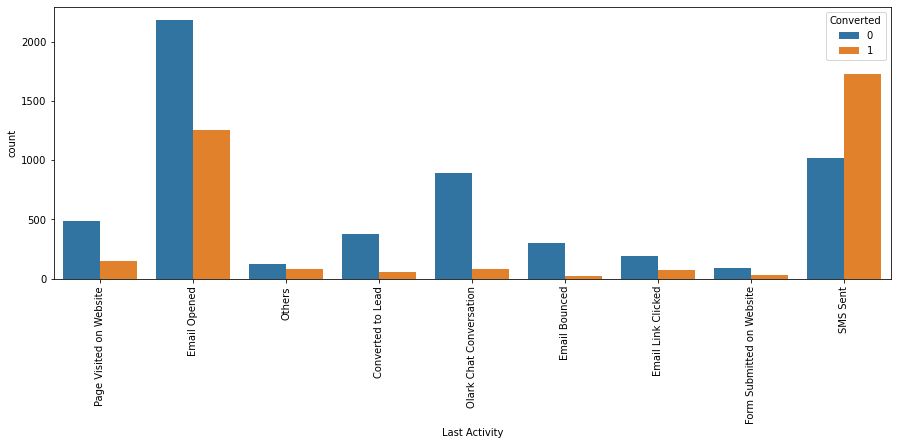

In [49]:
plt.figure(figsize = (15,5))
s8 = sns.countplot(leads['Last Activity'],hue = leads.Converted)
s8.set_xticklabels(s8.get_xticklabels() , rotation = 90)
plt.show()

#### Here we again observe that the highest conversions is with the customers whom msg was sent 

### Now we have two columns which have only two categories

In [50]:
leads['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

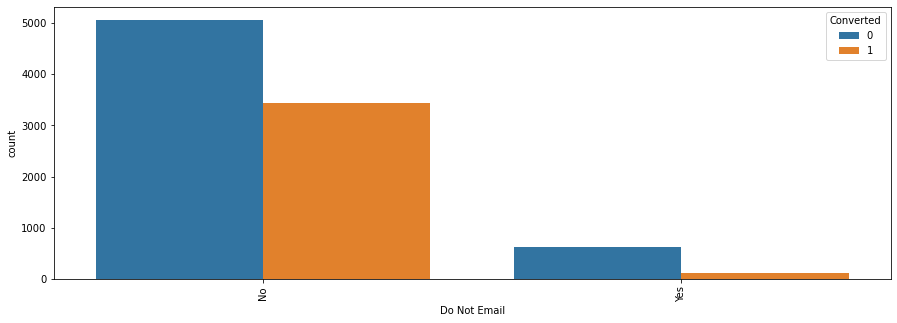

In [51]:
plt.figure(figsize = (15,5))
s9 = sns.countplot(leads['Do Not Email'],hue = leads.Converted)
s9.set_xticklabels(s9.get_xticklabels() , rotation = 90)
plt.show()

In [52]:
leads['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

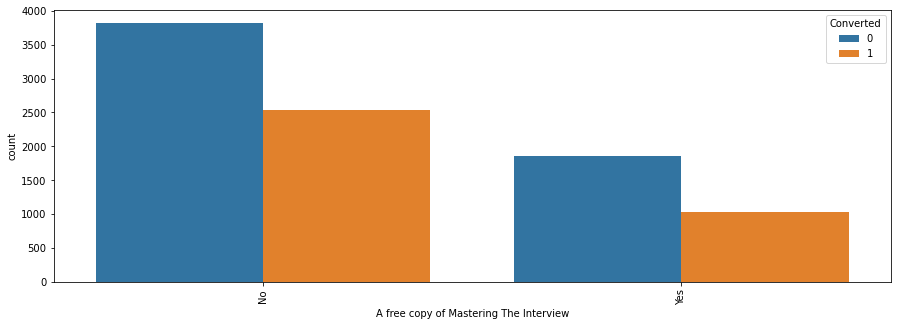

In [53]:
plt.figure(figsize = (15,5))
s10 = sns.countplot(leads['A free copy of Mastering The Interview'],hue = leads.Converted)
s10.set_xticklabels(s10.get_xticklabels() , rotation = 90)
plt.show()

#### By the above these two bi- category columnns we cannot say much about the conversions ratio.

## Now we will observe all those columns  and drop those which have high imbalances 
- First we impute the null values with the mode of the columns and even then, if they have high imbalances we will drop them.

In [54]:
#checking value counts of Country column

leads['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
Philippines                2
Netherlands                2
Belgium                    2
Italy                      2
China                      2
Uganda                     2
Bangladesh                 2
Kenya                      1
Indonesia                  1
Switzerland                1
Denmark                    1
Vietnam                    1
Tanzania      

In [55]:
## here also we impute null values with the mode value of the column 
leads['Country'] = leads['Country'].replace(np.nan,'India')

In [56]:
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [57]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [58]:
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [59]:
leads['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

In [60]:
leads['Magazine'].value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

In [61]:
leads['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [62]:
leads['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [63]:
leads['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [64]:
leads['Digital Advertisement'].value_counts(dropna = False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [65]:
leads['Through Recommendations'].value_counts(dropna = False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [66]:
leads['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [67]:
leads['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [68]:
leads['Get updates on DM Content'].value_counts(dropna = False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [69]:
leads['I agree to pay the amount through cheque'].value_counts(dropna = False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [70]:
leads['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

###  So we have all the above  columns in which the data is highly skewed so better we drop these columns

In [71]:
leads = leads.drop(['Country','What matters most to you in choosing a course','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call'],1)

In [72]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

#### so we observe that there were 28 columns but now after removing 15 columns we have 13 columns remaining 

## Now we will explore the Numeric Columns 

In [73]:
df1 = leads.select_dtypes(include=['int64','float64'])
df1.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

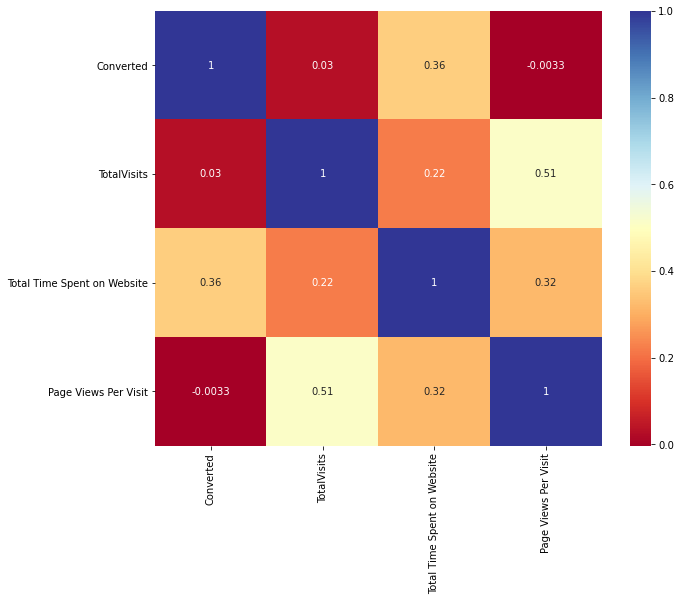

In [74]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="RdYlBu", annot=True)
plt.show()

#### As we can see that the columns highly correlated are TotalVisits and Page Views per visit so we can drop either of them . 

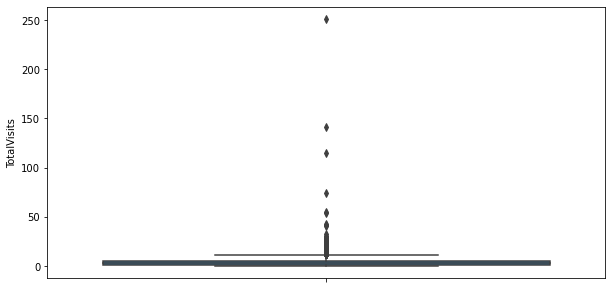

In [75]:
plt.figure(figsize =(10,5) )
sns.boxplot( y = leads.TotalVisits)
plt.show()

### so we can see that there are  many outliers so we need to treat them first or our analysis will not be good 
- so we will cut the data from 5 percentile to 99 percentile

In [76]:
leads['TotalVisits'].describe(percentiles = [0.05,0.25,0.50,0.75,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

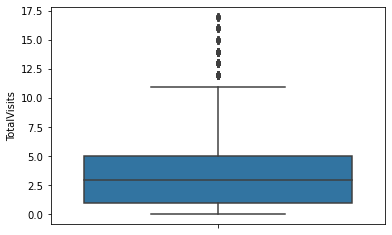

In [77]:
### So now we will remove the outliers and then replot the boxplot 
Q1 = leads['TotalVisits'].quantile(0.99)
Q3 = leads['TotalVisits'].quantile(0.01)
leads = leads[(leads['TotalVisits'] <=Q1)]
leads = leads[(leads['TotalVisits'] >=Q3)]
sns.boxplot(y = leads.TotalVisits)
plt.show()

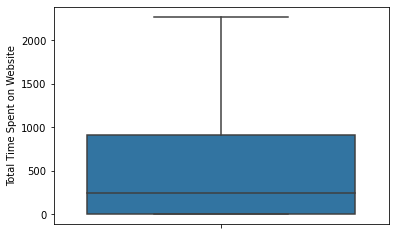

In [78]:
plt.figure(figsize = (6,4))
sns.boxplot( y =leads['Total Time Spent on Website'] )
plt.show()

In [79]:
leads['Total Time Spent on Website'].describe(percentiles = [0.05,0.25,0.50,0.75,0.95,0.99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

### As we can observe that the max value is quiet closer to the 99 percentile value so there is no actual outlier

In [80]:
leads['Page Views Per Visit'].describe(percentiles = [0.05,0.25,0.50,0.75,0.95,0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

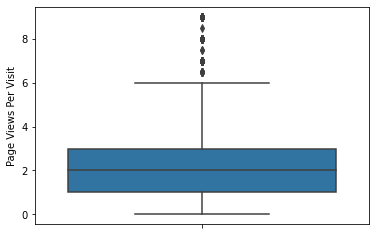

In [81]:
Q1 = leads['Page Views Per Visit'].quantile(0.99)
Q3 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] <= Q1)]
leads = leads[(leads['Page Views Per Visit'] >= Q3)] 
sns.boxplot(y = leads['Page Views Per Visit'])
plt.show()

### Now we will analyse our numeric variables with respect to our independent or target variable 'Converted'

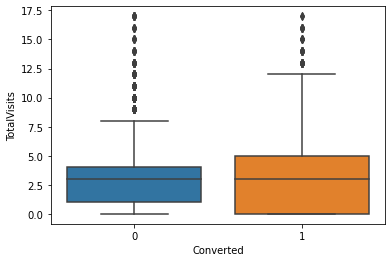

In [82]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

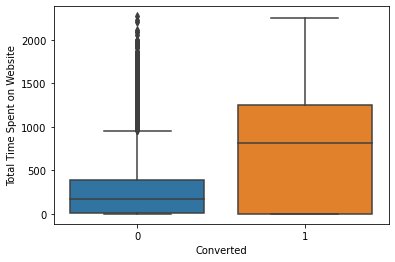

In [83]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time

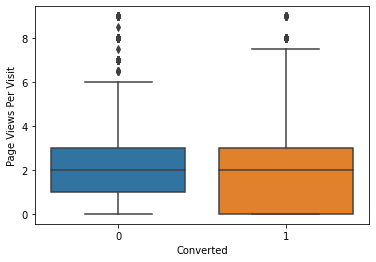

In [84]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

###  Step 3:   Pre-Steps of Model Building

### Mapping and the Creation of Dummy variables 

In [85]:
df = leads.select_dtypes(include = ['object'])
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### so we have two columns 'Do Not Email', 'A free copy of Mastering The Interview' with only two categories "yes" and 'no' so we need to map them to 1 and 0 and for the other columns we need to create dummy variaboles 

In [86]:
varlist = ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1 , 'No': 0})

    

In [87]:
leads[varlist] = leads[varlist].apply(binary_map)

In [88]:
leads[varlist]

,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
9235,1,0
9236,0,1
9237,1,1
9238,0,0


In [89]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],1)

In [90]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [91]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [92]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [93]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [94]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [95]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscelleneous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,1,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [96]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','What is your current occupation',
                             'City','Specialization','Lead Source','Last Activity','Last Notable Activity','Tags'], 1)

In [97]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscelleneous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 4 : Test-Train Split  for Preparation of Model

In [98]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

X=leads.drop('Converted', axis=1)

#### so here we took the target variable 'Converted' on y axis and all the other columns other than 'Converted' are taken on x axis 

In [99]:
# Splitting the data into train and test(70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [100]:
#scaling numeric columns, the different values in the numeric  columns are scaled by using Standard Scaler 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscelleneous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
9196,-0.28572,0.668862,1.848117,1.455819,-0.667339,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4696,-0.28572,-0.030697,-0.037832,0.399961,-0.667339,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3274,-0.28572,0.319082,-0.642138,-0.127967,-0.667339,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2164,-0.28572,-0.380477,-0.154676,-0.127967,-0.667339,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1667,-0.28572,0.319082,1.258415,-0.481679,-0.667339,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##  Step 5 : Making a Model by using Statsfunction and by using RFE 

In [101]:
import statsmodels.api as sm


In [102]:
## making a logistic model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1160.4
Date:                Wed, 11 Aug 2021   Deviance:                       2320.8
Time:                        01:49:50   Pearson chi2:                 1.20e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0867      1.936      0.045      0.964      -3.708       3.881
Do Not Email                                            -0.2040      0.082     -2.498      0.012      -0.364      -0.044
TotalVisits                                              0.2347      0.078      3.009      0.003       0.082       0.388
Total Time Spent on Website                              1.0821      0.065     16.775      0.000       0.956       1.209
Page Views Per Visit                                    -0.2992      0.097     -3.077      0.002      -0.490      -0.109
A free copy of Mastering The Interview                  -0.1227      0.087     -1.409      0.159      -0.293       0.048
Lead Origin_Landing Page Submission                     -0.6986      0.241     -2.901      0.004      -1.171      -0.227
Lead Origin_Lead Add Form                                1.5284      1.162      1.315      0.188      -0.749       3.806
Lead Origin_Lead Import                                 24.4836   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
What is your current occupation_Housewife               19.4549   1.96e+04      0.001      0.999   -3.85e+04    3.85e+04
What is your current occupation_Other                   -0.8593      2.350     -0.366      0.715      -5.465       3.747
What is your current occupation_Student                  0.5014      1.792      0.280      0.780      -3.010       4.013
What is your current occupation_Unemployed              -0.0573      1.662     -0.034      0.972      -3.315       3.200
What is your current occupation_Working Professional     0.9210      1.707      0.539      0.590      -2.425       4.268
City_Other Cities                                        0.2601      0.234      1.113      0.266      -0.198       0.718
City_Other Cities of Maharashtra                        -0.0430      0.295     -0.146      0.884      -0.622       0.536
City_Other Metro Cities                                  0.0096      0.315      0.030      0.976      -0.607       0.626
City_Thane & Outskirts                                  -0.0783      0.232     -0.338      0.735      -0.532       0.376
City_Tier II Cities                                      0.4732      0.646      0.733      0.464      -0.793       1.739
Specialization_Banking, Investment And Insurance         0.5787      0.378      1.533      0.125      -0.161       1.319
Specialization_Business Administration                   0.1467      0.355      0.413      0.679      -0.549       0.842
Specialization_E-Business                                0.1526      0.671      0.227      0.820      -1.163       1.468
Specialization_E-COMMERCE                                0

### As we can see there are many variables so we first do coarse tune by using RFE 

##  Feature Selection Using RFE

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [104]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 30),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Housewife', False, 39),
 ('What is your current occupation_Other', False, 32),
 ('What is your current occupation_Student', False, 36),
 ('What is your current occupation_Unemployed', False, 35),
 ('What is your current occupation_Working Professional', False, 12),
 ('City_Other Cities', False, 33),
 ('City_Other Cities of Maharashtra', False, 46),
 ('City_Other Metro Cities', False, 48),
 ('City_Thane & Outskirts', False, 45),
 ('City_Tier II Cities', False, 27),
 ('Specialization_Banking, Investment And Insurance', False, 20),
 ('Specialization_Business Administration', False, 44),
 ('Specialization_E-Business', False, 42),

In [107]:
col = X_train.columns[rfe.support_]

In [108]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
    

###  Step 6 Assessing the model with StatsModels and VIF

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1412.5
Date:                Wed, 11 Aug 2021   Deviance:                       2825.0
Time:                        01:50:04   Pearson chi2:                 1.13e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4118      0.078    -18.167      0.000      -1.564      -1.260
Lead Origin_Lead Add Form                         0.8960      0.436      2.053      0.040       0.041       1.751
Lead Source_Welingak Website                      4.1864      1.109      3.776      0.000       2.014       6.359
Last Activity_SMS Sent                            1.4118      0.210      6.711      0.000       1.000       1.824
Last Notable Activity_Modified                   -1.3834      0.144     -9.612      0.000      -1.665      -1.101
Last Notable Activity_Olark Chat Conversation    -1.5416      0.451     -3.416      0.001      -2.426      -0.657
Last Notable Activity_SMS Sent                    0.9887      0.244      4.059      0.000       0.511       1.466
Tags_Already a student                           -3.2142      0.713     -4.508      0.000      -4.612      -1.817
Tags_Closed by Horizzon                           7.2460      1.015      7.140      0.000       5.257       9.235
Tags_Interested in other courses                 -1.7851      0.377     -4.739      0.000      -2.523      -1.047
Tags_Lost to EINS                                 5.8417      0.598      9.764      0.000       4.669       7.014
Tags_Miscelleneous                               -1.9129      0.278     -6.893      0.000      -2.457      -1.369
Tags_Not doing further education                 -2.4777      1.010     -2.453      0.014      -4.458      -0.498
Tags_Ringing                                     -3.4838      0.232    -15.018      0.000      -3.938      -3.029
Tags_Will revert after reading the email          4.6246      0.176     26.233      0.000       4.279       4.970
Tags_switched off                                -4.0880      0.596     -6.856      0.000      -5.257      -2.919
=================================================================================================================
"""

#### As we observe that p value for any variable is not more 0.05 ,it mean all the variable are significant 

## Checking VIF

In [110]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.34
7,Tags_Closed by Horizzon,1.17
9,Tags_Lost to EINS,1.03
10,Tags_Miscelleneous,1.03
14,Tags_switched off,1.03
11,Tags_Not doing further education,1.02
4,Last Notable Activity_Olark Chat Conversation,1.01
5,Last Notable Activity_SMS Sent,0.96
0,Lead Origin_Lead Add Form,0.67
2,Last Activity_SMS Sent,0.34


### So we observe that VIF of any variable is not more than 2, this mean they are not highly correlated ,  which is a good sign so we can keep all of them 

In [112]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.076206
4696    0.076206
3274    0.728842
2164    0.010147
1667    0.961311
7024    0.195944
8018    0.049575
778     0.200464
6942    0.057582
4440    0.195944
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07620627, 0.07620627, 0.7288416 , 0.01014724, 0.9613115 ,
       0.1959439 , 0.04957475, 0.20046439, 0.057582  , 0.1959439 ])

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.076206,9196
1,0,0.076206,4696
2,0,0.728842,3274
3,0,0.010147,2164
4,1,0.961311,1667


### here we take a probability of 0.5 above which we will consider the reponse to be yes 

In [115]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.076206,9196,0
1,0,0.076206,4696,0
2,0,0.728842,3274,1
3,0,0.010147,2164,0
4,1,0.961311,1667,1


### Now we will calculate the confusion matrix of our training data set and then the other parameters like accuracy, specificity, sensitivity etc , Also we will draw a ROC curve afterwards to see if we could revise our probability value 

In [116]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3730  152]
 [ 330 2055]]


In [117]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9230891973831179


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8616352201257862

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.9608449252962391

In [121]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03915507470376095


In [122]:
# positive predictive value 
print (TP / float(TP+FP))

0.9311282283642954


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9187192118226601


In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False) 

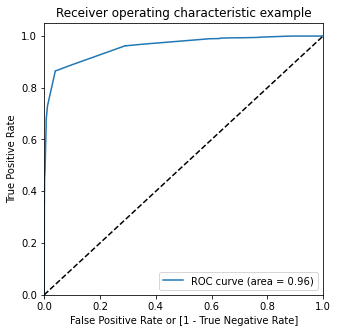

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve area should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

## Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.076206,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.076206,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.728842,3274,1,1,1,1,1,1,1,1,1,0,0
3,0,0.010147,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.961311,1667,1,1,1,1,1,1,1,1,1,1,1


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.805010  0.961845  0.708655
0.2   0.2  0.900271  0.885115  0.909583
0.3   0.3  0.924047  0.864990  0.960330
0.4   0.4  0.923408  0.862474  0.960845
0.5   0.5  0.923089  0.861635  0.960845
0.6   0.6  0.923089  0.861635  0.960845
0.7   0.7  0.923089  0.861635  0.960845
0.8   0.8  0.890219  0.731237  0.987893
0.9   0.9  0.873305  0.679245  0.992530


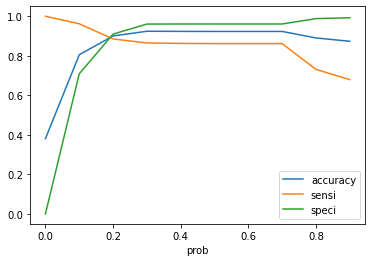

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.2 is the optimum point to take it as a cutoff probability 

### Now we will take this value and again make a model

In [130]:


y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.076206,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.076206,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.728842,3274,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.010147,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.961311,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [131]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.076206,9196,0,8
1,0,0.076206,4696,0,8
2,0,0.728842,3274,1,73
3,0,0.010147,2164,0,1
4,1,0.961311,1667,1,96


##  Step   7 : Predictions on Training data set

In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.900271262166906

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3531,  351],
       [ 274, 2111]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8851153039832285

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9095826893353941

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 90.02%
Sensitivity : 88.51%
Specificity : 90.95%




### Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [137]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.09041731066460587


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8574329813160032


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9279894875164257


In [140]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3531,  351],
       [ 274, 2111]], dtype=int64)

In [141]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8574329813160032

In [142]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8851153039832285

In [143]:
from sklearn.metrics import precision_score, recall_score

In [144]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8851153039832285

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

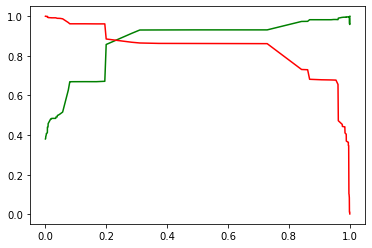

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Step 8 : Now we analyse the Test data set and do Certain Predictions

In [148]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscelleneous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7681,-0.301634,0.575687,-0.311318,0.092860,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
984,-0.301634,-0.090676,-0.550262,0.356568,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8135,3.315278,-0.423857,0.812462,-0.170849,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,-0.301634,0.242505,-0.628665,-0.170849,1.448461,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2712,-0.301634,-0.090676,-0.421456,0.356568,-0.690388,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [149]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscelleneous,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7681,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
984,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
8135,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2712,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [150]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET


In [151]:
y_test_pred = res.predict(X_test_sm)

In [152]:
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

7681    0.076206
984     0.009976
8135    0.728842
6915    0.007424
2712    0.961311
244     0.001872
4698    0.195944
8287    0.057582
6791    0.961311
8970    0.010147
dtype: float64

In [154]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [155]:
# Let's see the head
y_pred_1.head()

,0
7681,0.076206
984,0.009976
8135,0.728842
6915,0.007424
2712,0.961311


In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [157]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [158]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [159]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.076206
1,0,984,0.009976
2,0,8135,0.728842
3,0,6915,0.007424
4,1,2712,0.961311


In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [162]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.076206
1,0,984,0.009976
2,0,8135,0.728842
3,0,6915,0.007424
4,1,2712,0.961311


In [163]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [164]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.076206,8
1,984,0,0.009976,1
2,8135,0,0.728842,73
3,6915,0,0.007424,1
4,2712,1,0.961311,96


In [165]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [166]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.076206,8,0
1,984,0,0.009976,1,0
2,8135,0,0.728842,73,1
3,6915,0,0.007424,1,0
4,2712,1,0.961311,96,1


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9039463886820551

In [168]:
confusion2 =  metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1529,  147],
       [ 111,  899]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8900990099009901

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.912291169451074

In [172]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8594646271510517

In [173]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8900990099009901

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 90.39%
Sensitivity : 89.00%
Specificity : 91.22%

## Final Observation:
Let us compare the values obtained for Train & Test:

### Train Data: 
Accuracy : 90.02%
Sensitivity : 88.51%
Specificity : 90.95%
### Test Data: 
Accuracy : 90.39%
Sensitivity :  89.00%
Specificity : 91.22%


## The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model